[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SEC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SEC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading IMDb dataset...
Train samples: 25000, Test samples: 25000
Padding sequences to max length: 250...
Padded train shape: (25000, 250)
Padded test shape: (25000, 250)

Visualizing data distribution...


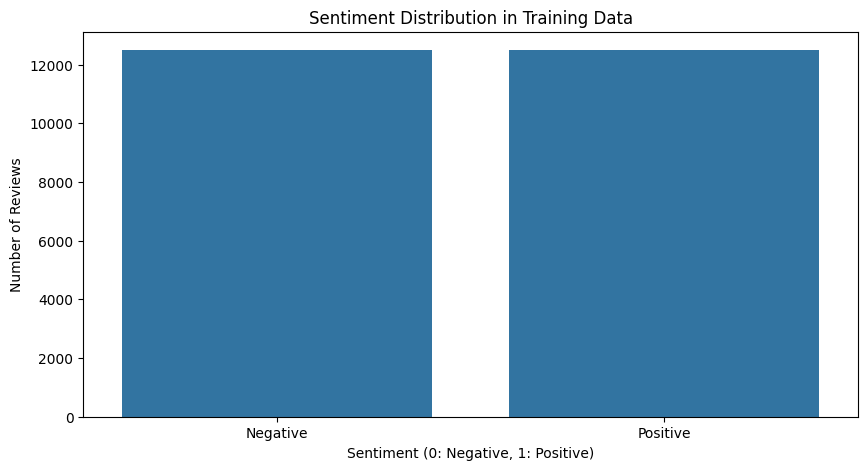

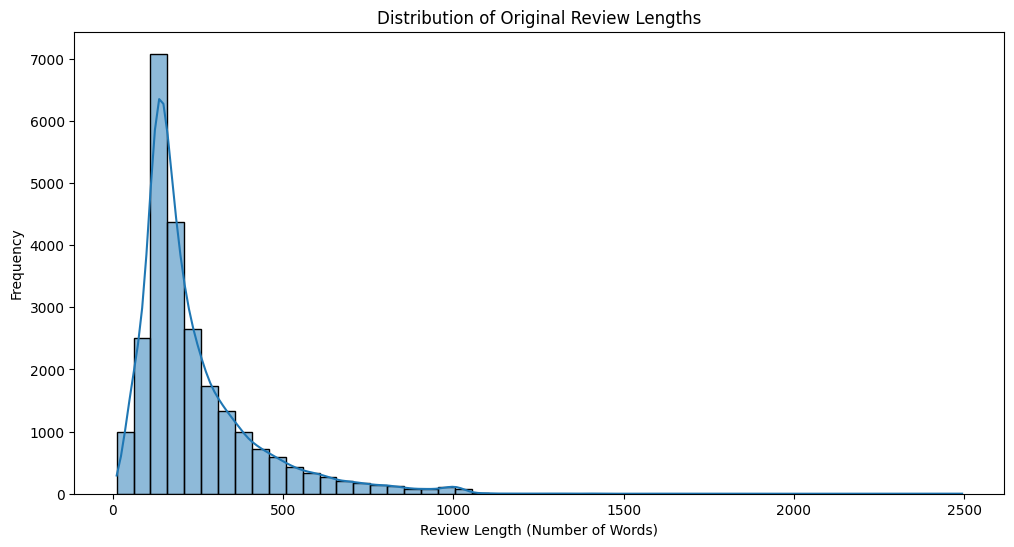


Building Bidirectional LSTM model with Embedding dimension: 128...


C:\Users\SEC\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 125ms/step - accuracy: 0.7184 - loss: 0.5361 - val_accuracy: 0.8156 - val_loss: 0.4086 - learning_rate: 0.0010
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.8883 - loss: 0.2856 - val_accuracy: 0.8622 - val_loss: 0.3587 - learning_rate: 0.0010
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 133ms/step - accuracy: 0.9234 - loss: 0.2066 - val_accuracy: 0.8678 - val_loss: 0.3457 - learning_rate: 0.0010
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 133ms/step - accuracy: 0.9329 - loss: 0.1740 - val_accuracy: 0.8704 - val_loss: 0.3878 - learning_rate: 0.0010
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.9403 - loss: 0.1634 - val_accuracy: 0.8360 - val_loss: 0.4310 - learning_rate: 0.0010
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 217s 348ms/step - accuracy: 0.9475 - loss: 0.1512 - val_accuracy: 0.8708 - val_loss: 0.4298 - learning_rate: 2.0000e-04

Evaluating model on test data...


Test Loss: 0.3620
Test Accuracy: 0.8602
Model saved to sentiment_bidirectional_lstm_model.h5
Word index saved to word_index.json

Visualizing training history...


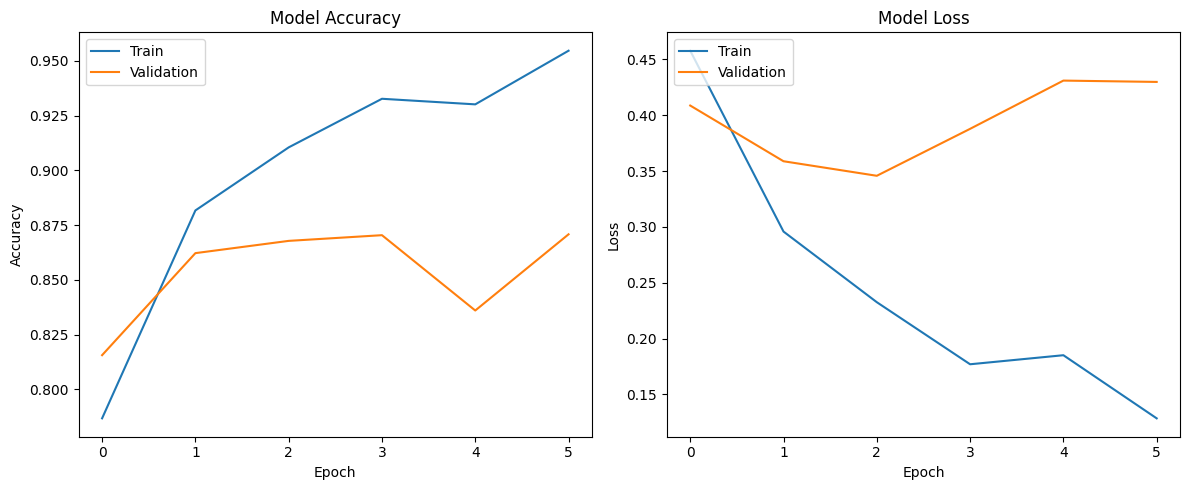


Predicting on a few test examples:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


NameError: name 'decode_review' is not defined

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter

# TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
# --- IMPORTANT CHANGES HERE ---
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
# -----------------------------
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau # New Callbacks

# NLTK for advanced preprocessing (install if you haven't: pip install nltk)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data (run once)

nltk.download('stopwords')
nltk.download('wordnet')

# --- NOTE ON STOPWORDS FOR SENTIMENT ANALYSIS ---
# Sometimes, removing stopwords like 'not', 'no', 'never' can hurt sentiment analysis.
# For simplicity, we'll keep the standard stopword list for now, but be aware.
# If negative sentiment is still an issue, consider customizing this list.
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# --- Configuration for data loading and preprocessing ---
MAX_FEATURES = 10000  # Number of words to consider as features (vocabulary size)
MAX_LEN = 250        # Max sequence length for padding

print("Loading IMDb dataset...")
# Keep the num_words for consistency, ensures vocabulary size is limited
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)
print(f"Train samples: {len(x_train)}, Test samples: {len(x_test)}")

# --- Data Padding ---
print(f"Padding sequences to max length: {MAX_LEN}...")
x_train = pad_sequences(x_train, maxlen=MAX_LEN)
x_test = pad_sequences(x_test, maxlen=MAX_LEN)
print(f"Padded train shape: {x_train.shape}")
print(f"Padded test shape: {x_test.shape}")

# --- Optional: Reverse word index to see actual words ---
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# --- Data Distribution Visualization ---
print("\nVisualizing data distribution...")
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train)
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Number of Reviews')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()
# NOTE: IMDb is generally balanced (25k positive, 25k negative), so imbalance isn't usually the core issue here.

original_lengths = [len(s) for s in imdb.load_data(num_words=MAX_FEATURES)[0][0]]
plt.figure(figsize=(12, 6))
sns.histplot(original_lengths, bins=50, kde=True)
plt.title('Distribution of Original Review Lengths')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()


# --- Model Architecture ---
# Using Bidirectional LSTM for better performance
EMBEDDING_DIM = 128 # Dimension of the dense embedding.

print(f"\nBuilding Bidirectional LSTM model with Embedding dimension: {EMBEDDING_DIM}...")
model = Sequential([
    Embedding(input_dim=MAX_FEATURES, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    # Changed from SimpleRNN to Bidirectional LSTM
    Bidirectional(LSTM(units=64, return_sequences=False)), # LSTM units can be increased (e.g., 128)
    Dropout(0.5), # Standard dropout rate, experiment if needed
    Dense(1, activation='sigmoid') # Binary classification output
])

# Define a custom learning rate for Adam optimizer
# LEARNING_RATE = 0.001 # Default for Adam, but you can tune it
# optimizer = Adam(learning_rate=LEARNING_RATE)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# --- Callbacks for better training ---
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Reduce learning rate when validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# --- Model Training ---
print("\nTraining the model...")
BATCH_SIZE = 32
EPOCHS = 10 # Increased epochs, but early stopping will manage overfitting

history = model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2, # Use 20% of training data for validation
    callbacks=[early_stopping, reduce_lr], # Add callbacks here
    verbose=1
)

# --- Model Evaluation ---
print("\nEvaluating model on test data...")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# --- Save the trained model ---
MODEL_PATH = 'sentiment_bidirectional_lstm_model.h5' # New name for the improved model
model.save(MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

# Save word_index for deployment
import json
with open('word_index.json', 'w') as f:
    json.dump(word_index, f)
print("Word index saved to word_index.json")


# --- Training History Visualizations ---
print("\nVisualizing training history...")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# --- Predict on a few examples to see performance ---
print("\nPredicting on a few test examples:")
predictions = model.predict(x_test[:10])
for i in range(10):
    review = decode_review(x_test[i])
    true_sentiment = "Positive" if y_test[i] == 1 else "Negative"
    predicted_sentiment = "Positive" if predictions[i][0] >= 0.5 else "Negative"
    print(f"\nReview: {review[:100]}...") # Print first 100 chars
    print(f"True: {true_sentiment}, Predicted: {predicted_sentiment} (Prob: {predictions[i][0]:.4f})")